In [2]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Данные:
Будем работать с датасетом [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()

In [5]:
X, y = data['data'], data['target']

In [6]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

### Задание:
Будем решать задачу классификации на 3 класса. В качестве модели используется нейронная сеть с одним скрытым слоем. Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа нейронов скрытого слоя. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа нейронов скрытого слоя.

In [31]:
def baseline_model(hidden_input, dim):
    # create model
    model = Sequential()
    model.add(Dense(hidden_input, input_dim=dim, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [26]:
%%time
hidden_inputs = range(1, 5)
means = []
stds = []
for i in hidden_inputs:
    #model = baseline_model(hidden_input=i)
    estimator = KerasClassifier(build_fn=baseline_model, hidden_input=i, dim = 4, epochs=20, batch_size=5, verbose=0)
    result = cross_val_score(estimator, X, dummy_y, cv=kfold)
    means.append(result.mean()*100)
    stds.append(result.std()*100)
    print("Model with %d neurons in hidden layer: ac = %.2f%% (std = %.2f%%)" % (i, result.mean()*100, result.std()*100))

Model with 1 neurons in hidden layer: ac = 38.67% (std = 21.46%)
Model with 2 neurons in hidden layer: ac = 38.67% (std = 24.00%)
Model with 3 neurons in hidden layer: ac = 60.67% (std = 16.45%)
Model with 4 neurons in hidden layer: ac = 42.67% (std = 23.13%)
Wall time: 12min


In [32]:
import matplotlib.pyplot as plt

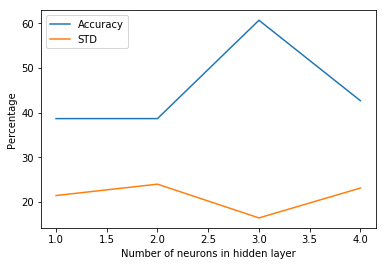

In [29]:
plt.plot(hidden_inputs, means, label='Accuracy')
plt.plot(hidden_inputs, stds, label="STD")
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [44]:
%%time
hidden_input = 3
dims = range(1, 5)
means = []
stds = []
for i in dims:
    #model = baseline_model(hidden_input=i)
    estimator = KerasClassifier(build_fn=baseline_model, hidden_input=hidden_input, dim = i, epochs=20, batch_size=5, verbose=0)
    result = cross_val_score(estimator, X[:, :i], dummy_y, cv=kfold)
    means.append(result.mean()*100)
    stds.append(result.std()*100)
    print("Model with dim = %d: ac = %.2f%% (std = %.2f%%)" % (i, result.mean()*100, result.std()*100))

Model with dim = 1: ac = 27.33% (std = 14.13%)
Model with dim = 2: ac = 35.33% (std = 16.34%)
Model with dim = 3: ac = 41.33% (std = 26.13%)
Model with dim = 4: ac = 47.33% (std = 23.37%)
Wall time: 15min 46s


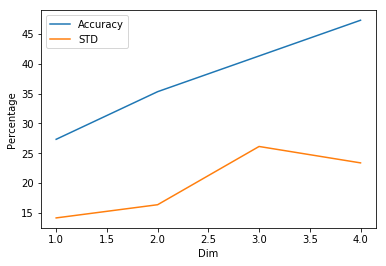

In [45]:
plt.plot(hidden_inputs, means, label='Accuracy')
plt.plot(hidden_inputs, stds, label="STD")
plt.xlabel("Dim")
plt.ylabel("Percentage")
plt.legend()
plt.show()

In [37]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, dummy_y, epochs=255, batch_size=5, verbose=1, validation_split=0.3)

Train on 105 samples, validate on 45 samples
Epoch 1/255
105/105 [==============================] - 1s 12ms/step - loss: 0.8266 - acc: 0.6762 - val_loss: 3.3849 - val_acc: 0.0000e+00
Epoch 2/255
105/105 [==============================] - 0s 3ms/step - loss: 0.5925 - acc: 0.9524 - val_loss: 3.1281 - val_acc: 0.0000e+00
Epoch 3/255
105/105 [==============================] - 0s 3ms/step - loss: 0.4716 - acc: 0.9524 - val_loss: 3.1825 - val_acc: 0.0000e+00
Epoch 4/255
105/105 [==============================] - 0s 3ms/step - loss: 0.3824 - acc: 0.9524 - val_loss: 2.5880 - val_acc: 0.0000e+00
Epoch 5/255
105/105 [==============================] - 0s 2ms/step - loss: 0.3297 - acc: 0.9524 - val_loss: 2.9096 - val_acc: 0.0000e+00
Epoch 6/255
105/105 [==============================] - 0s 3ms/step - loss: 0.2883 - acc: 0.9524 - val_loss: 2.4439 - val_acc: 0.0000e+00
Epoch 7/255
105/105 [==============================] - 0s 3ms/step - loss: 0.2629 - acc: 0.9524 - val_loss: 2.7292 - val_acc: 0.0000

Epoch 61/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0425 - acc: 0.9905 - val_loss: 0.8969 - val_acc: 0.4222
Epoch 62/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0421 - acc: 0.9810 - val_loss: 0.7853 - val_acc: 0.5111
Epoch 63/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0409 - acc: 0.9905 - val_loss: 1.0891 - val_acc: 0.4000
Epoch 64/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0404 - acc: 0.9810 - val_loss: 0.7629 - val_acc: 0.5333
Epoch 65/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0519 - acc: 1.0000 - val_loss: 1.3547 - val_acc: 0.2444
Epoch 66/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0535 - acc: 0.9714 - val_loss: 1.0209 - val_acc: 0.4222
Epoch 67/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0448 - acc: 0.9905 - val_loss: 0.8235 - val_acc: 0.4889
Epoch 68/255
105/105 [==============================] - 0s 3ms

Epoch 122/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0171 - acc: 1.0000 - val_loss: 0.7013 - val_acc: 0.6222
Epoch 123/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0177 - acc: 1.0000 - val_loss: 0.6157 - val_acc: 0.6222
Epoch 124/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0204 - acc: 1.0000 - val_loss: 0.4886 - val_acc: 0.8000
Epoch 125/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0163 - acc: 1.0000 - val_loss: 0.7484 - val_acc: 0.6222
Epoch 126/255
105/105 [==============================] - ETA: 0s - loss: 0.0198 - acc: 1.000 - 0s 2ms/step - loss: 0.0190 - acc: 1.0000 - val_loss: 0.7654 - val_acc: 0.6222
Epoch 127/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0207 - acc: 0.9905 - val_loss: 0.9443 - val_acc: 0.5333
Epoch 128/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0179 - acc: 0.9905 - val_loss: 0.4754 - val_acc: 0.8000
Epoch 129/255
105

105/105 [==============================] - 0s 3ms/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.7244 - val_acc: 0.6222
Epoch 183/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0122 - acc: 1.0000 - val_loss: 0.4882 - val_acc: 0.8000
Epoch 184/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0153 - acc: 1.0000 - val_loss: 0.6163 - val_acc: 0.7333
Epoch 185/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.5607 - val_acc: 0.7556
Epoch 186/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0134 - acc: 1.0000 - val_loss: 0.8866 - val_acc: 0.6222
Epoch 187/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0188 - acc: 0.9905 - val_loss: 0.6664 - val_acc: 0.6667
Epoch 188/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0204 - acc: 0.9905 - val_loss: 0.8516 - val_acc: 0.6222
Epoch 189/255
105/105 [==============================] - 0s 3ms/step 

Epoch 243/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0078 - acc: 1.0000 - val_loss: 0.7949 - val_acc: 0.6222
Epoch 244/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0080 - acc: 1.0000 - val_loss: 0.8942 - val_acc: 0.6222
Epoch 245/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.6101 - val_acc: 0.7556
Epoch 246/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 1.0000 - val_loss: 0.8382 - val_acc: 0.6222
Epoch 247/255
105/105 [==============================] - 0s 2ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.5587 - val_acc: 0.8000
Epoch 248/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0103 - acc: 0.9905 - val_loss: 0.9176 - val_acc: 0.6222
Epoch 249/255
105/105 [==============================] - 0s 3ms/step - loss: 0.0088 - acc: 1.0000 - val_loss: 0.6373 - val_acc: 0.7556
Epoch 250/255
105/105 [==============================] 

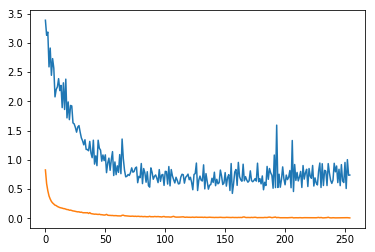

In [42]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

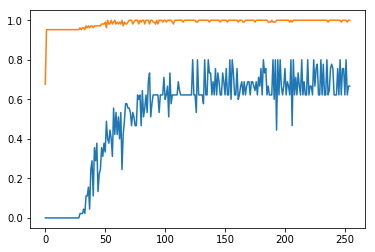

In [41]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.show()